<a href="https://colab.research.google.com/github/Oyindamola011/Teens-addiction-to-phones/blob/main/Teens_addiction_to_phones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Teens 🤳 phones addiction dataset cleaning 🧹
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/Teens_phone_addiction_dataset_original.csv')

In [ ]:
print(df.head())

   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...       

In [ ]:
print(df.shape)

(3000, 25)


In [ ]:
print('📃data info before cleaning:\n')
print(df.info())
print(df.isnull().sum())

📃data info before cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Co

In [ ]:
df.columns =df.columns.str.strip().str.lower().str.replace(' ','_')

In [ ]:
print(df.head())

   id               name  age  gender          location school_grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   daily_usage_hours  sleep_hours  academic_performance  social_interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  screen_time_before_bed  phone_checks_per_day  apps_used_daily  \
0  ...       

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for col in ['gender','location','school_grade']:
 df[col] = df[col].fillna('Unknown')

In [ ]:
# Fill numeric missing values
num_cols = [
    'daily_usage_hours', 'sleep_hours', 'exercise_hours', 'screen_time_before_bed',
    'phone_checks_per_day', 'apps_used_daily', 'time_on_education', 'time_on_social_media',
    'time_on_gaming', 'weekend_usage_hours', 'addiction_level'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

In [ ]:
# Calculate average daily phone usage across all teens
average_usage = df['daily_usage_hours'].mean()

# Show result
print(f"The average daily phone usage across all teens is {average_usage:.1f} hours.")

The average daily phone usage across all teens is 5.0 hours.


In [ ]:
# Group the data by 'gender', then calculate the average of 'daily usage hours' for each group
avg_by_gender = df.groupby('gender')['daily_usage_hours'].mean().round(2)

# Print the result nicely
print("Average daily phone usage by gender")
print(avg_by_gender)

Average daily phone usage by gender
gender
Female    5.05
Male      5.05
Other     4.95
Name: daily_usage_hours, dtype: float64


In [ ]:
# Group by 'school grade' and calculate average usage
avg_by_grade = df.groupby('school_grade')['daily_usage_hours'].mean().round(2)

# Print the result
print("\nAverage daily phone usage by school grade:")
print(avg_by_grade)


Average daily phone usage by school grade:
school_grade
10th    4.98
11th    5.06
12th    4.94
7th     5.08
8th     5.07
9th     5.01
Name: daily_usage_hours, dtype: float64


In [ ]:
Correlation= df['screen_time_before_bed'] .corr(df['sleep_hours'])
rounded_correlation = round(Correlation,2)
print('The correlation between screen time before bed and sleep hours:',rounded_correlation)

The correlation between screen time before bed and sleep hours: -0.0


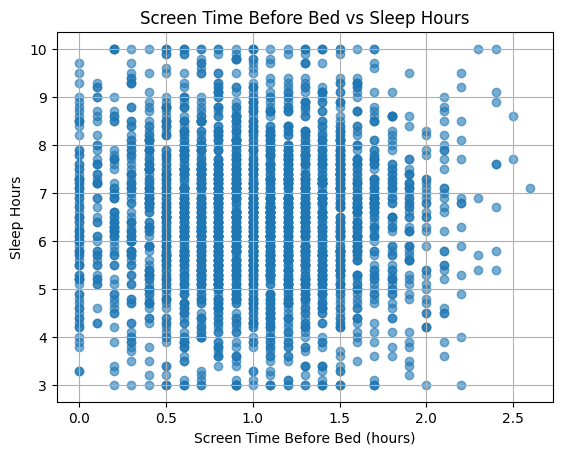

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['screen_time_before_bed'], df['sleep_hours'], alpha=0.6)
plt.title("Screen Time Before Bed vs Sleep Hours")
plt.xlabel("Screen Time Before Bed (hours)")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.show()


In [ ]:
df.groupby('gender')[['screen_time_before_bed','sleep_hours']].corr().unstack().iloc[:,1]


,screen_time_before_bed
,sleep_hours
gender,
Female,-0.006218
Male,-0.007902
Other,0.001673


In [ ]:
#Most used phone usage among teens
purpose_counts = df['phone_usage_purpose'].value_counts()
print('Most used phone usage purposes:\n')
print(purpose_counts)

Most used phone usage purposes:

phone_usage_purpose
Browsing        627
Other           622
Education       602
Social media    575
Gaming          574
Name: count, dtype: int64


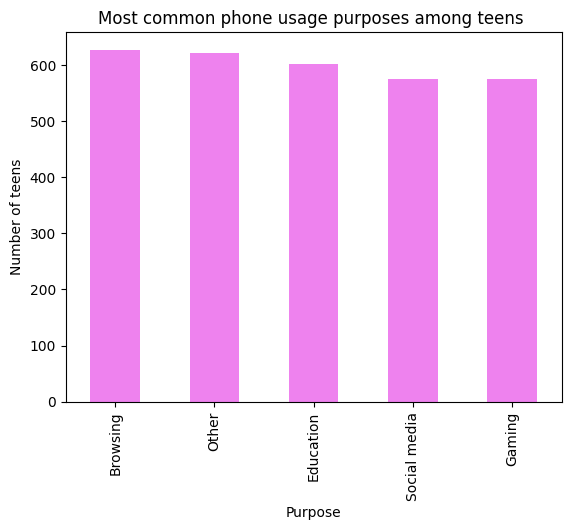

In [ ]:
# Diagram showing the most used phone usage purposes among teens
purpose_counts.plot(kind='bar', color = 'violet')
plt.title('Most common phone usage purposes among teens ')
plt.xlabel('Purpose')
plt.ylabel('Number of teens')
plt.show()

In [ ]:
threshold = df['addiction_level'].quantile(0.75)
print('Threshold for high addiction level:',threshold)


Threshold for high addiction level: 10.0


In [ ]:
high_addiction = df[df['addiction_level'] >= threshold]


In [ ]:
avg_usage = high_addiction['daily_usage_hours'].mean()
avg_checks = high_addiction['phone_checks_per_day'].mean()

print("Average daily usage hours (high addiction teens):", round(avg_usage, 2))
print("Average phone checks per day (high addiction teens):", round(avg_checks, 2))


Average daily usage hours (high addiction teens): 6.13
Average phone checks per day (high addiction teens): 91.34


In [ ]:
avg_addiction=df.groupby('parental_control')['addiction_level'].mean().round(2)
print(avg_addiction)

parental_control
0    8.88
1    8.88
Name: addiction_level, dtype: float64


In [ ]:
# Analyse the correlation between teens academic performance and time spent on apps
avg_academic = {
    'Education time':df['time_on_education'].corr(df['academic_performance']),
    'Social media time':df['time_on_social_media'].corr(df['academic_performance']),
    'Gaming time':df['time_on_gaming'].corr(df['academic_performance'])
    }

 #print the correlation
print ('📊The average correlation between teens academic performance and time spent on apps:\n')
for k,v in avg_academic.items():
  print(f'{k}:{round(v,2)}')

📊The average correlation between teens academic performance and time spent on apps:

Education time:0.02
Social media time:0.04
Gaming time:-0.03


In [ ]:
# Make sure the columns are in numeric

for col in ['self_esteem','anxiety_level','depression_level']:
  df[col]=pd.to_numeric(df[col],errors='coerce')


  #Check the correlation between self esteem and both variables
correlation_result= {
  'anxiety_corr':df['self_esteem'].corr(df['anxiety_level']),
  'depression_corr':df['self_esteem'].corr(df['depression_level'])
  }

  #display result of correlation
print('📊The correlation between self esteem and both variables:\n')
for k,v in correlation_result.items():
   print(f'{k}:{round(v,2)}')

📊The correlation between self esteem and both variables:

anxiety_corr:0.0
depression_corr:-0.03


In [ ]:
# Make sure the columns are in numeric

for col in ['daily_usage_hours','weekend_usage_hours']:
  df[col]=pd.to_numeric(df[col],errors='coerce')

  # Calculate the average hours between weekdays and weekends
avg_weekdays=df['daily_usage_hours'].mean().round(2)
avg_weekends=df['weekend_usage_hours'].mean().round(2)

print('📊the average hours spent on weekdays and weekends')
print(f'Weekdays:{round(avg_weekdays,2)}hours/days')
print(f'Weekends:{round(avg_weekends,2)}hours/days')

📊the average hours spent on weekdays and weekends
Weekdays:5.02hours/days
Weekends:6.02hours/days


In [ ]:
# Check what family communication values look like
print(df["family_communication"].unique())

# If the column is numeric, we can categorize it into groups
df["family_comm_Level"] = pd.cut(
    df["family_communication"],
    bins=[0, 3, 7, 10],  # depends on your scale (0–10 for example)
    labels=["Low", "Medium", "High"]
)

# Group the data to see average social media and self-esteem by communication level
grouped = df.groupby("family_comm_Level")[["time_on_social_media", "self_esteem"]].mean()
print("📊 Average Social Media Usage & Self-Esteem by Family Communication Level:")
print(grouped)


[ 4  2  6  8 10  7  9  5  3  1]
📊 Average Social Media Usage & Self-Esteem by Family Communication Level:
                   time_on_social_media  self_esteem
family_comm_Level                                   
Low                            2.517834     5.647702
Medium                         2.495104     5.557676
High                           2.485585     5.425653


/tmp/ipython-input-1194627678.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("family_comm_Level")[["time_on_social_media", "self_esteem"]].mean()


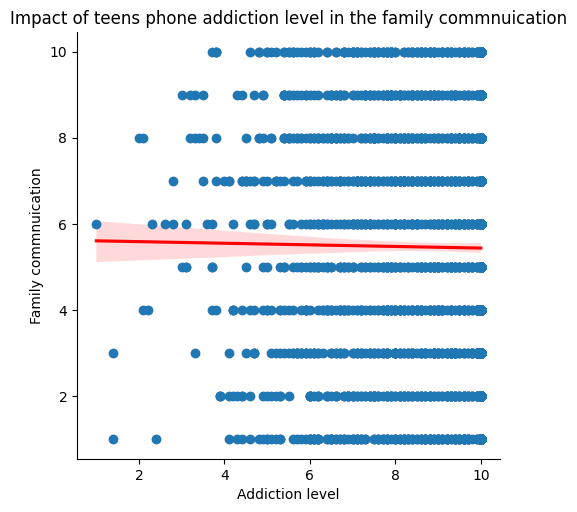

In [ ]:
# Relationship between addiction level and family communication

import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with a line of best fit
sns.lmplot(
    x="addiction_level",
    y="family_communication",
    data=df,
    scatter_kws={'alpha':0.6, 'color':'pink'},
    line_kws={'color':'red'}
)
plt.scatter(df['addiction_level'],df['family_communication'])
plt.title('Impact of teens phone addiction level in the family commnuication')
plt.xlabel('Addiction level')
plt.ylabel('Family commnuication')
plt.show()

In [ ]:
# checking out the correlation between addition level and family communication

corr=df['addiction_level'],df['family_communication'])
print('The correlation between addiction level and family communication level:.round(corr,2)')


The correlation between addiction level and family communication level: -0.01
